In [1]:
import serial
import numpy as np
from PIL import Image
import keyboard
import matplotlib.pyplot as plt

In [2]:
sarr = []
for i in range(4):
	s = '1111000'
	s = s[:i] + '0' + s[i + 1:]
	for j in range(8):
		s2 = str(bin(j))[2:]
		s = s[:-len(s2)] + s2
		sarr.append(s)
print(sarr)

['0111000', '0111001', '0111010', '0111011', '0111100', '0111101', '0111110', '0111111', '1011000', '1011001', '1011010', '1011011', '1011100', '1011101', '1011110', '1011111', '1101000', '1101001', '1101010', '1101011', '1101100', '1101101', '1101110', '1101111', '1110000', '1110001', '1110010', '1110011', '1110100', '1110101', '1110110', '1110111']


In [9]:
# Establish the serial connection
# ser = serial.Serial('COM5', 9600) # for josh
ser = serial.Serial('/dev/tty.usbmodem2101', 9600) # for pablo

#size 256 array
handArray =  np.arange(256, dtype=float)
#3d data set
dataSet = np.empty((0, 16, 16), dtype=float)
start = False
i = 0
j = 0 

command = ''
while command != 'g':
  command = input("type g to begin")
  ser.write(command.encode())

while True:
  
  if keyboard.is_pressed('esc'):
    res = input("type g to end")
    if (res == 'g'):
      ser.write(res.encode())
      np.save('dataSet.npy', dataSet)
      break
    elif (res[0] == 'f'):
      ser.write(res.encode())
  
  data = ser.readline()
  data = data.decode().strip().split() # Decode the received bytes and remove whitespace
  selects = data[0]
  # data = [int(data[k:k+1]) for k in range(len(data))]
  inputData = np.float_(data[1:])*5/1024
  if (selects == sarr[0]):
    start = True
  # if (start):
  #   print(selects, inputData)
  
  if (start):
    if (selects != sarr[j]):
      print(j, selects, "error")
    # print(i, selects, (inputData))

    #loops through array with prper indexing
    if i < 8:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 8:
        i = 64

    elif i > 8 and i < 72:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 72:
        i = 128
      
    elif i > 72 and i < 136:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 136:
        i = 192
    
    elif i > 135 and i < 200:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 200:
        i = 0
        array = (np.reshape(handArray, (16,16)))
        print(array)
        dataSet = np.append(dataSet,[array], axis = 0)
    
    j = (j+1) % 32

#close the connection
ser.close()


[[ 0.06347656 -0.04882812 -0.03417969  0.12695312 -0.20019531  0.04882812
   0.16113281  0.52246094  1.10351562  0.67382812  0.00976562 -0.02441406
   0.20507812  0.41503906  0.30761719  0.05859375]
 [-0.13183594 -0.0390625   0.16113281 -0.3125      0.71777344 -0.29296875
   0.34667969  1.10351562  0.10253906  0.33203125  0.25878906  0.37597656
  -0.0390625  -0.06835938  0.625       0.10742188]
 [-0.52246094  0.62988281  0.47851562  0.00488281  2.44140625 -0.1171875
   0.71289062  2.43164062  0.40039062  0.04394531  0.36621094  0.02441406
   0.18554688 -0.07324219  0.1953125  -0.10742188]
 [-0.10253906  0.29296875 -0.11230469  0.29785156 -0.45410156  0.90820312
  -0.44433594  0.92285156 -0.14648438  1.04980469 -0.14160156  1.06445312
   0.32714844 -0.26367188  0.32714844 -0.28320312]
 [ 0.1953125   0.15625     1.15722656 -0.38085938  2.44140625  0.56152344
   1.49414062  0.8984375  -0.078125   -0.41015625  0.90820312  0.5859375
   0.72753906  0.10253906  0.09765625  0.07324219]
 [-0.35

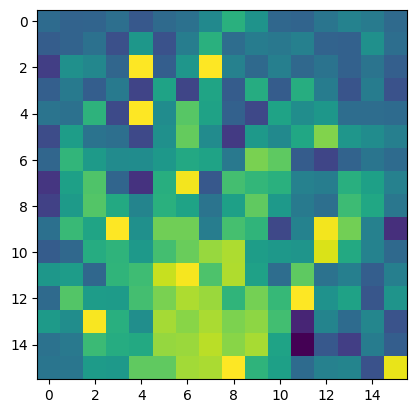

In [10]:
d = np.load('dataSet.npy')

image = Image.new("1", (16, 16))
# Load the pixel data from the array
pixels = [pixel for row in d[0] for pixel in row]

# Put the pixel data into the image
image.putdata(pixels)

# Save the image to a file
image.save("output.png")

plt.imshow(d[0])
plt.savefig('pltfig.png')

In [11]:
for i in range(0, len(d)):
    print(d[i])
    print()

[[ 0.06347656 -0.04882812 -0.03417969  0.12695312 -0.20019531  0.04882812
   0.16113281  0.52246094  1.10351562  0.67382812  0.00976562 -0.02441406
   0.20507812  0.41503906  0.30761719  0.05859375]
 [-0.13183594 -0.0390625   0.16113281 -0.3125      0.71777344 -0.29296875
   0.34667969  1.10351562  0.10253906  0.33203125  0.25878906  0.37597656
  -0.0390625  -0.06835938  0.625       0.10742188]
 [-0.52246094  0.62988281  0.47851562  0.00488281  2.44140625 -0.1171875
   0.71289062  2.43164062  0.40039062  0.04394531  0.36621094  0.02441406
   0.18554688 -0.07324219  0.1953125  -0.10742188]
 [-0.10253906  0.29296875 -0.11230469  0.29785156 -0.45410156  0.90820312
  -0.44433594  0.92285156 -0.14648438  1.04980469 -0.14160156  1.06445312
   0.32714844 -0.26367188  0.32714844 -0.28320312]
 [ 0.1953125   0.15625     1.15722656 -0.38085938  2.44140625  0.56152344
   1.49414062  0.8984375  -0.078125   -0.41015625  0.90820312  0.5859375
   0.72753906  0.10253906  0.09765625  0.07324219]
 [-0.35